In [18]:
import django
import os
import json
os.environ['DJANGO_SETTINGS_MODULE'] = 'django_settings'
django.setup()

In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import math

In [3]:
from web_crawler.models import *


In [4]:
aws_url = 'https://monde-web-crawler.s3.ap-northeast-2.amazonaws.com/'

In [5]:
f = CategoryCategories.objects.last()

In [6]:
url=f.bag_image.bag_image.url

In [7]:
URL = aws_url + url

In [8]:
CrawlerBagimage.objects.count()

131

CrawlerBagimage object (30)


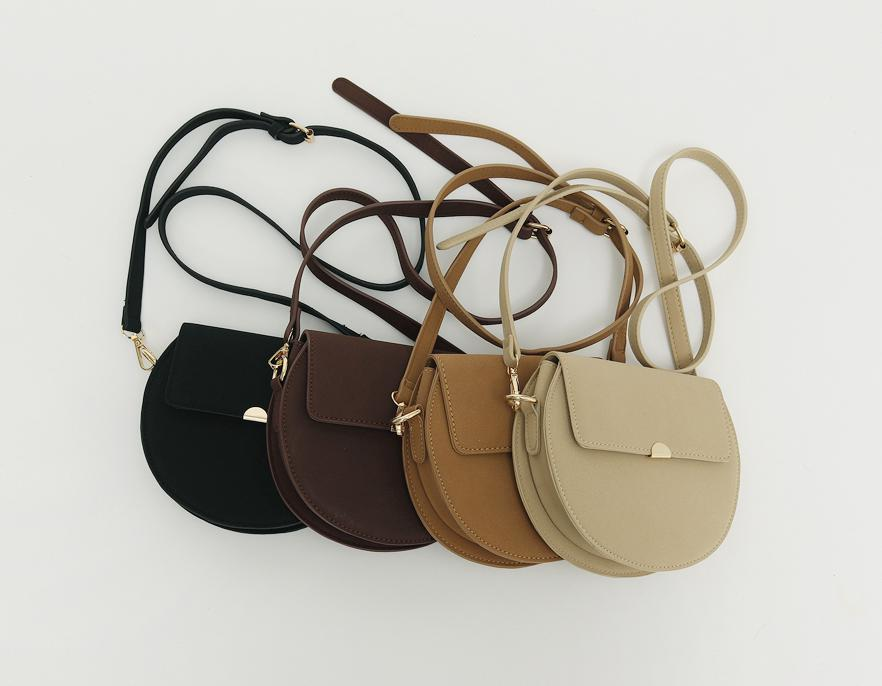

CrawlerBagimage object (31)


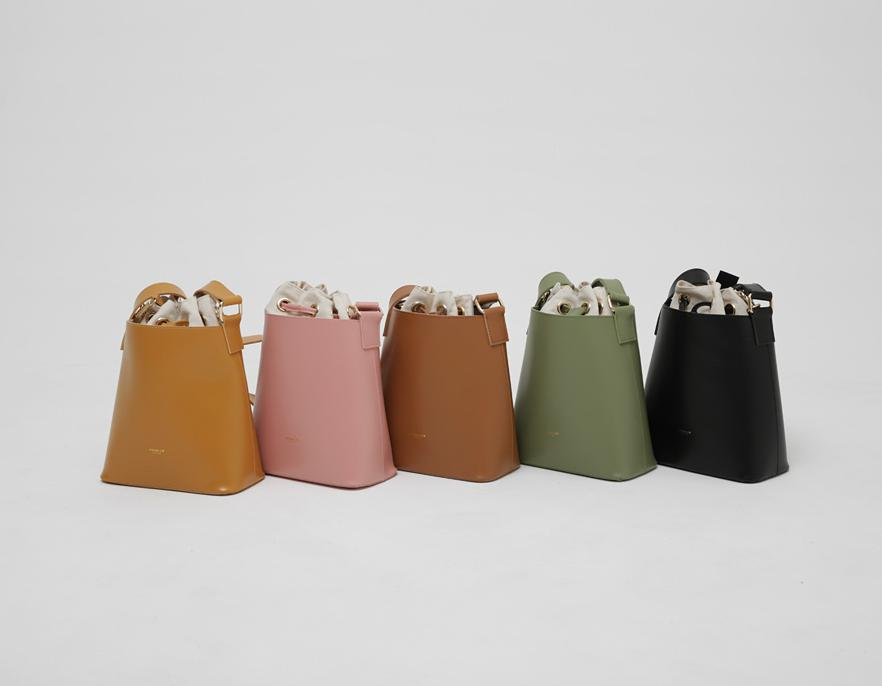

CrawlerBagimage object (32)


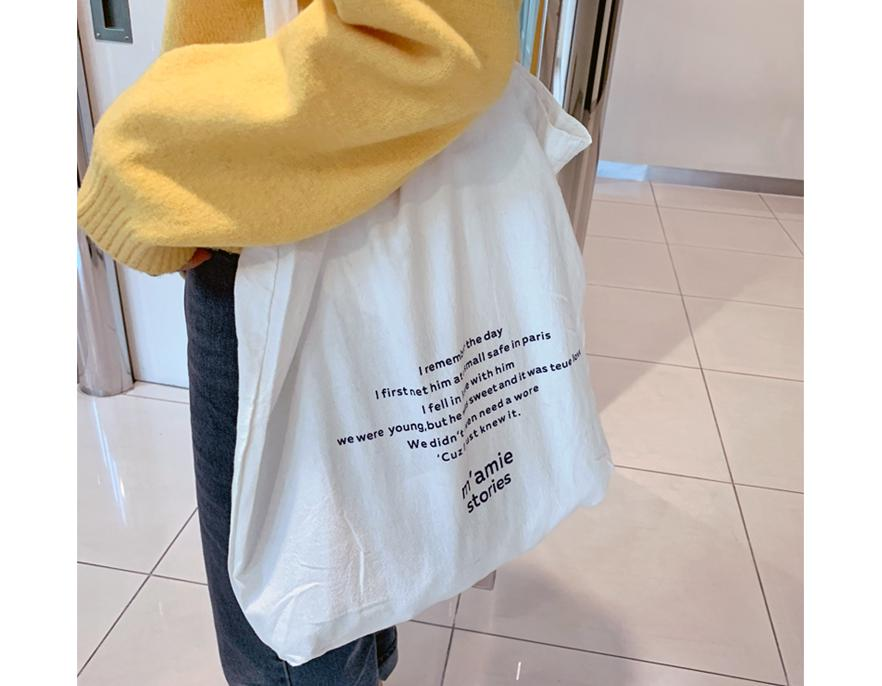

CrawlerBagimage object (33)


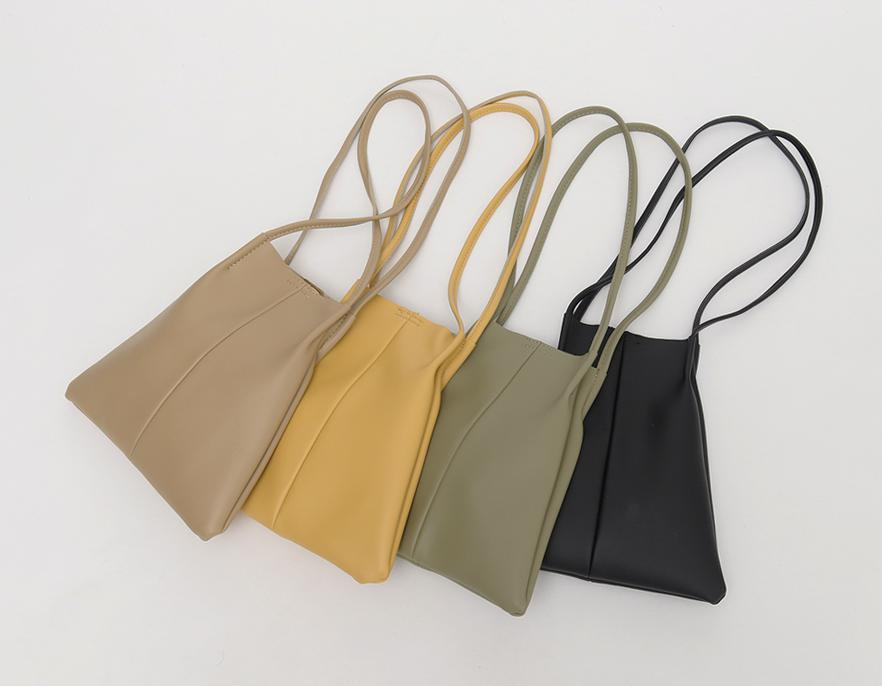

CrawlerBagimage object (34)


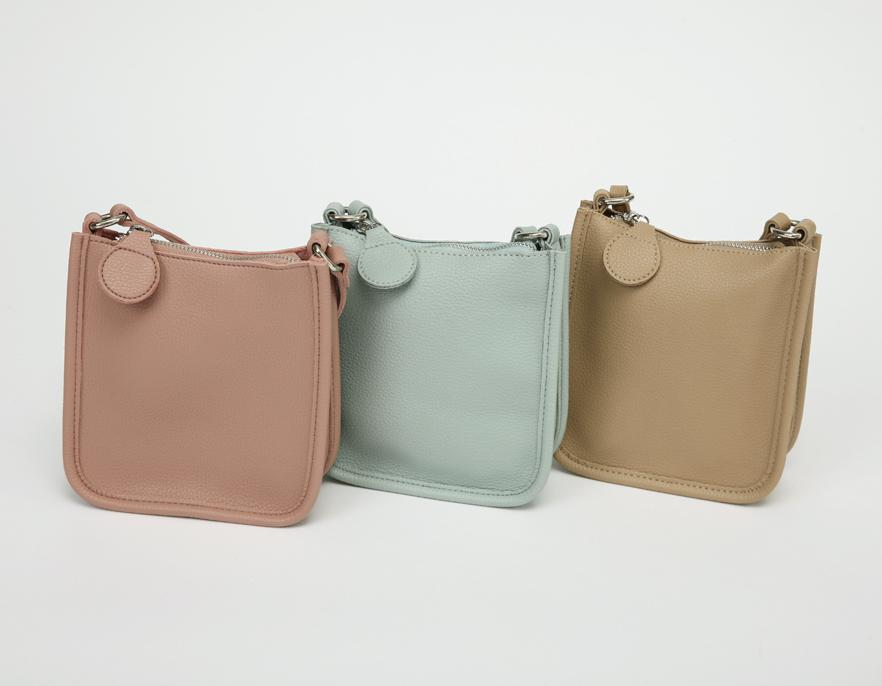

CrawlerBagimage object (35)


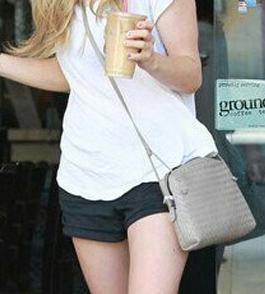

CrawlerBagimage object (36)


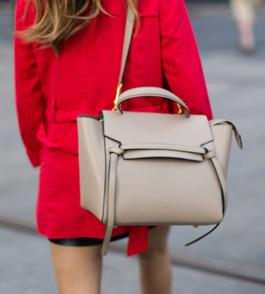

CrawlerBagimage object (37)


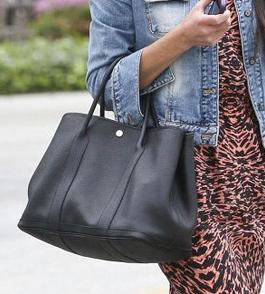

CrawlerBagimage object (38)


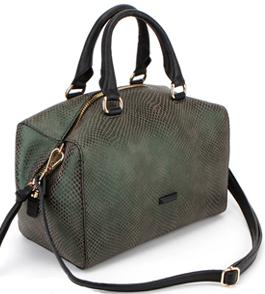

CrawlerBagimage object (39)


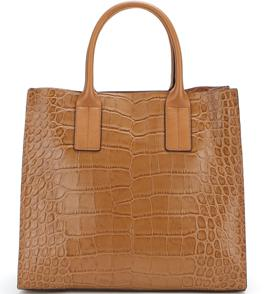

CrawlerBagimage object (40)


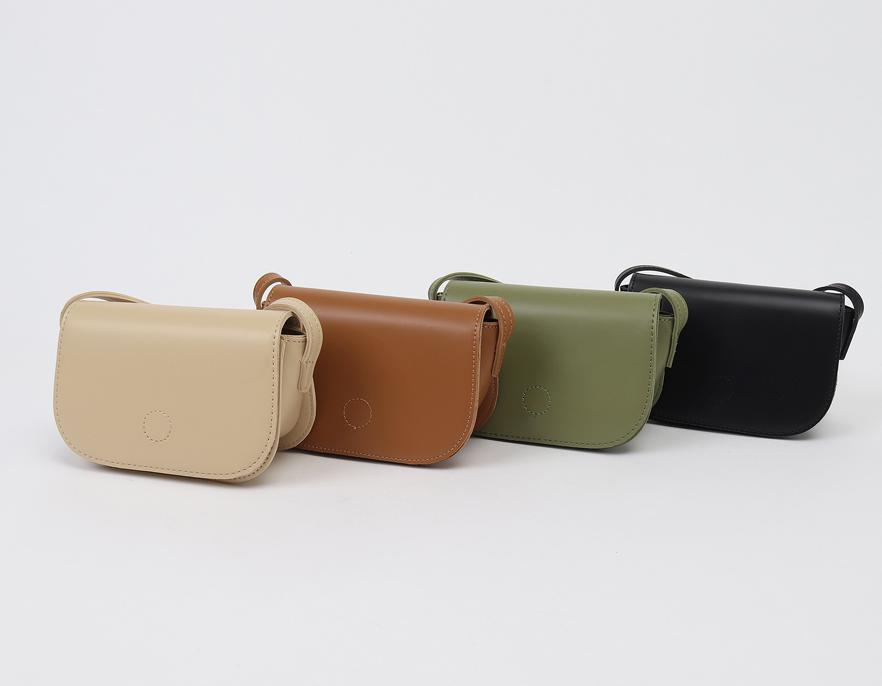

CrawlerBagimage object (47)


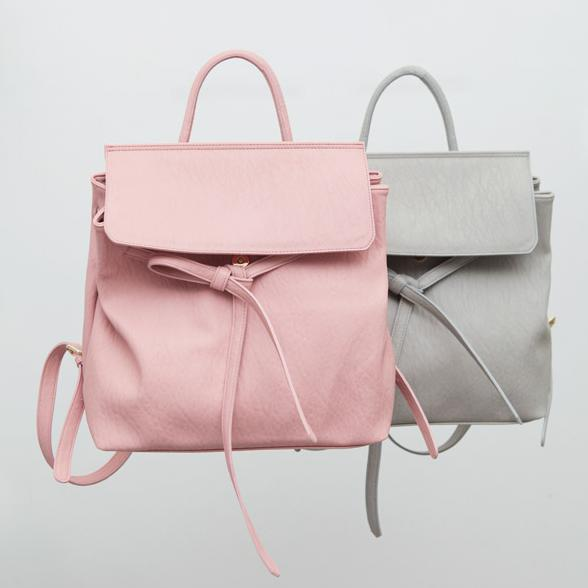

CrawlerBagimage object (48)


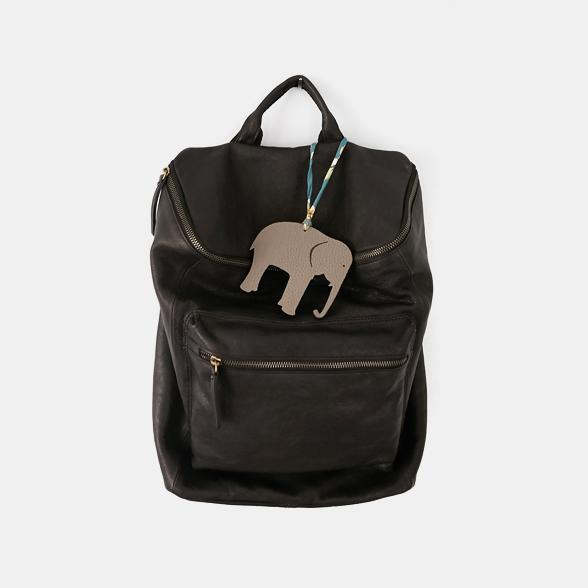

CrawlerBagimage object (49)


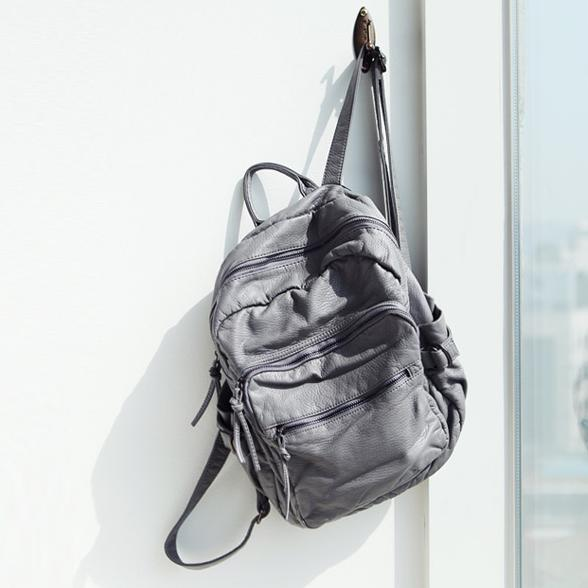

CrawlerBagimage object (50)


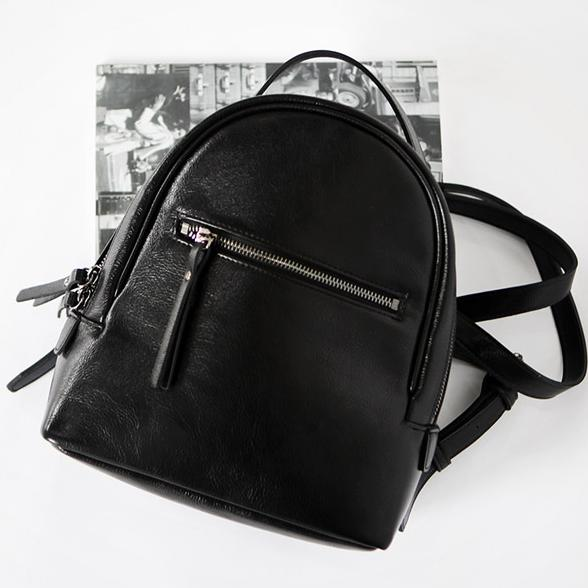

CrawlerBagimage object (51)


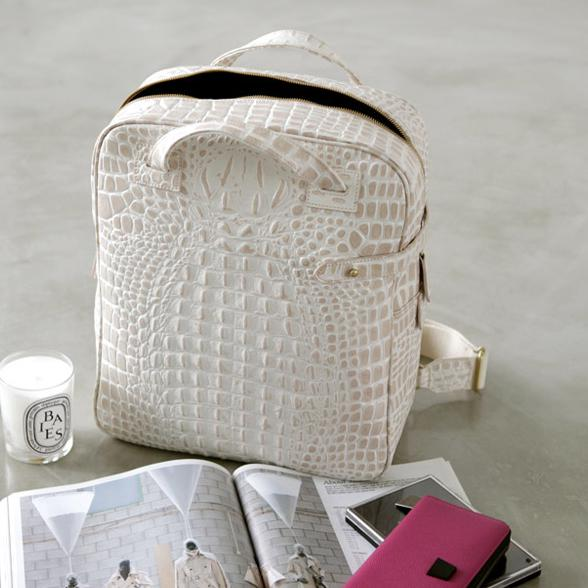

CrawlerBagimage object (52)


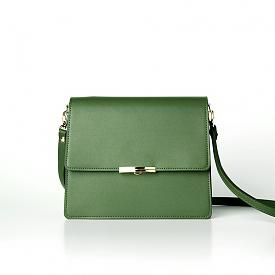

CrawlerBagimage object (53)


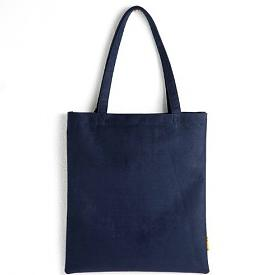

CrawlerBagimage object (54)


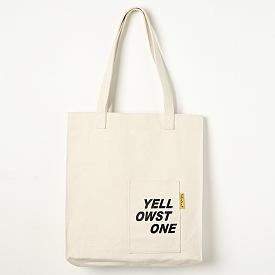

CrawlerBagimage object (55)


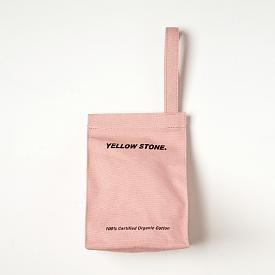

In [9]:
for c in CrawlerBagimage.objects.all()[25:45]:
    url = c.bag_image.url
    URL = aws_url + url
    print(c)
    display(Image(requests.get(URL).content ,height=10))

In [9]:
user_input = {
    "shape" : "bucket",
    "color" : "brown",
    "handle" : "tote"
}

In [10]:
def is_include(value, data):
    if value in data:
        return True
    return False

In [11]:
def get_data_result(category, instance):
    s_data = instance.shape_result
    h_data = instance.handle_result
    ch_data = instance.charm_result
    co_data = instance.color_result
    d_data = instance.deco_result
    p_data = instance.pattern_result
    if category == 'shape':
        return(s_data)
    elif category == 'handle':
        return(h_data)
    elif category == 'charm':
        return(ch_data)
    elif category == 'color':
        return(co_data)
    elif category == 'deco':
        return(d_data)
    elif category == 'pattern':
        return(p_data)
    return None

In [12]:
def pass_filter(value, count):
    result = value * math.sqrt(((count/10) + 1) * count)
    return result

In [13]:
def product_overlap_count(user_input, instance):
    count = 0
    value = 0
    weight = 2
    
    for category in user_input.keys():
        data = get_data_result(category, instance)
        user_select = user_input[category]
        if user_select in data:
            count +=1
            value += data[user_select] * weight
            
    if count == 0:
        pass
    
    result = pass_filter(value, count)
    print(count)

    return instance, result

In [14]:
# 결과값이 0인 것들도 보여줘야 할까? 보여주는거 vs 안보여주고 데이터 조금 보여주는거

In [15]:
def filtered_data(instance, user_input, result_dict):
    i, result = product_overlap_count(user_input, instance)
    if result != 0:
        result_dict[i]=result
    else:
        pass
    return result_dict

In [16]:
user_input = {
    "shape" : "square",
    "handle" : "big_shoulder"
}

In [ ]:
result_dict={}
for i in CategoryCategories.objects.all():
    result_dict = filtered_data(i, user_input, result_dict)

In [19]:
# TODO : weight 정하기. 선택하는 순서에 따라?

In [ ]:
sorted_x = sorted(result_dict, key=lambda kv: result_dict[kv], reverse=True)
map_it = list(map(lambda x: x.bag_image.product, sorted_x))

In [21]:
def check_temp_data(instance, user_input):
    for category in user_input.keys():
        data = get_data_result(category, instance)
        print(data)

In [25]:
sorted_category_result_list = sorted(result_dict, key=lambda kv: result_dict[kv], reverse=True)
sorted_product_result_list = list(map(lambda x: x.bag_image.product.id, sorted_category_result_list))

In [26]:
sorted_product_result_list

[95, 94, 120, 108, 124, 125, 96, 107, 123, 105, 109, 118, 128, 104]